# Customisation of Selenium 

So I am scraping linkedin using a dummy account I created and I am gathering the follower count and employee count of some of the largest tech companies and then I am analysing these figures. 

In [1]:
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time
import random
import csv
import logging

# Logging setup
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Configuration
LINKEDIN_EMAIL = os.getenv("LINKEDIN_EMAIL", "dummyemail705705@gmail.com")
LINKEDIN_PASSWORD = os.getenv("LINKEDIN_PASSWORD", "@Dummy!705")

# Companies to scrape
companies = {
    "Microsoft": "https://www.linkedin.com/company/microsoft/",
    "Google": "https://www.linkedin.com/company/google/",
    "OpenAI": "https://www.linkedin.com/company/openai/",
    "Apple": "https://www.linkedin.com/company/apple/",
    "NVIDIA": "https://www.linkedin.com/company/nvidia/",
    "Amazon": "https://www.linkedin.com/company/amazon/",
    "Meta": "https://www.linkedin.com/company/meta/",
    "Tesla": "https://www.linkedin.com/company/tesla-motors/",
    "SpaceX": "https://www.linkedin.com/company/spacex/",
    "IBM": "https://www.linkedin.com/company/ibm/",
}

# Sets up Selenium Webdriver with Chrome options
def setup_driver():
    options = Options()
    options.add_argument("--start-maximized")
    options.add_argument("--disable-notifications")
    return webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

#Logs into LinkedIn
def login_to_linkedin(driver):
    logging.info("Logging into LinkedIn...")
    driver.get("https://www.linkedin.com/login")
    time.sleep(random.uniform(2, 4))
    driver.find_element(By.ID, "username").send_keys(LINKEDIN_EMAIL)
    driver.find_element(By.ID, "password").send_keys(LINKEDIN_PASSWORD)
    driver.find_element(By.CSS_SELECTOR, "button[type='submit']").click()
    time.sleep(random.uniform(5, 7))

#Fetches data from linkedIn company page
def scrape_company_data(driver, company_name, company_url):
    logging.info(f"Scraping data for {company_name}...")
    driver.get(company_url)
    time.sleep(random.uniform(3, 6))

    try:
        followers_element = driver.find_element(By.XPATH, "/html/body/div[7]/div[3]/div/div[2]/div/div[2]/main/div[1]/section/div/div[2]/div[2]/div[1]/div[2]/div/div/div[2]/div[2]")
        follower_count = followers_element.text if followers_element else "N/A"

        employees_element = driver.find_element(By.XPATH, "/html/body/div[7]/div[3]/div/div[2]/div/div[2]/main/div[1]/section/div/div[2]/div[2]/div[1]/div[2]/div/div/div[2]/a/span")
        employees = employees_element.text if employees_element else "N/A"

        return {"company": company_name, "followers": follower_count, "employees": employees}
    except Exception as e:
        logging.error(f"Error scraping {company_name}: {e}")
        return {"company": company_name, "followers": "N/A", "employees": "N/A"}

#Saves the scraped data to a csv file
def save_to_csv(data, filename="linkedin_data.csv"):
    keys = data[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=keys)
        writer.writeheader()
        writer.writerows(data)
    logging.info(f"Data saved to {filename}")

# Main script
def main():
    driver = setup_driver()
    try:
        login_to_linkedin(driver)

        all_data = []
        for company_name, company_url in companies.items():
            company_data = scrape_company_data(driver, company_name, company_url)
            all_data.append(company_data)
            time.sleep(random.uniform(1, 3))  # Prevent rate limiting

        save_to_csv(all_data)
    finally:
        driver.quit()

if __name__ == "__main__":
    main()


Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 2
2024-12-07 15:53:32,280 - INFO - ====== WebDriver manager ======
2024-12-07 15:53:32,645 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-07 15:53:32,739 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-07 15:53:32,796 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-07 15:53:33,005 - INFO - WebDriver version 131.0.6778.87 selected
2024-12-07 15:53:33,009 - INFO - Modern chrome version https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.87/mac-x64/chromedriver-mac-x64.zip
2024-12-07 15:53:33,010 - INFO - About to download new driver from https://storage.googleapis.com/chrome-for-testing-public/131.0.6778.87/mac-x64/chromedriver-mac-x64.zip
2024-12-07 15:53:33,197 - INFO - Driver downloading response is 200
2024-12-07 15:53:33,561 - INFO - Get LATEST chromedriver version for google-chrome
2024-12-07 15

In [3]:
import pandas as pd
df = pd.read_csv("linkedin_data.csv")

df


2024-12-05 19:31:01,738 - INFO - NumExpr defaulting to 8 threads.


,company,followers,employees
0,Microsoft,24M followers,10K+ employees
1,OpenAI,6M followers,201-500 employees
2,Apple,18M followers,10K+ employees
3,NVIDIA,3M followers,10K+ employees
4,Amazon,NaN,NaN
5,Meta,11M followers,10K+ employees
6,Tesla,12M followers,10K+ employees
7,SpaceX,3M followers,1K-5K employees
8,IBM,18M followers,10K+ employees


In [4]:
import pandas as pd

# Clean the 'followers' and 'employees' columns
df["followers"] = df["followers"].str.replace("followers", "").str.strip()
df["employees"] = df["employees"].str.replace("employees", "").str.replace("+", "").str.strip()

# Function to convert follower counts to integers
def convert_to_int(value):
    if pd.isna(value) or value == "NaN":
        return None
    if "M" in value:
        return int(float(value.replace("M", "").strip()) * 1_000_000)
    elif "K" in value:
        return int(float(value.replace("K", "").strip()) * 1_000)
    elif value.isdigit():
        return int(value)
    return None

# Function to convert employee counts to integers
def convert_employees(value):
    if pd.isna(value) or value == "NaN":
        return None
    if "-" in value:  # Handle ranges like "1K-5K"
        return int(value.split("-")[0].replace("K", "").strip()) * 1_000
    if "K" in value:  # Handle "10K"
        return int(value.replace("K", "").strip()) * 1_000
    elif value.isdigit():  # Handle plain numbers
        return int(value)
    return None

# Apply the conversion functions
df["followers"] = df["followers"].apply(convert_to_int)
df["employees"] = df["employees"].apply(convert_employees)

# Remove rows with NaN values
df = df.dropna()

# Display the final DataFrame
print("\nCleaned and Converted DataFrame (with NaN rows removed):")
print(df)





Cleaned and Converted DataFrame (with NaN rows removed):
     company   followers  employees
0  Microsoft  24000000.0    10000.0
1     OpenAI   6000000.0   201000.0
2      Apple  18000000.0    10000.0
3     NVIDIA   3000000.0    10000.0
5       Meta  11000000.0    10000.0
6      Tesla  12000000.0    10000.0
7     SpaceX   3000000.0     1000.0
8        IBM  18000000.0    10000.0


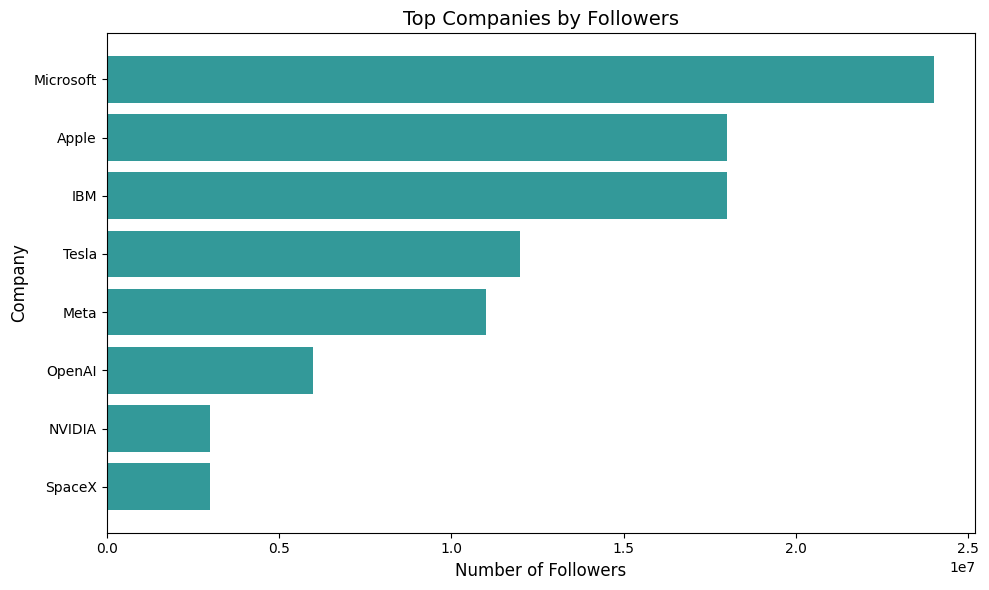

/var/folders/m4/ntrzdnw15wl9gpyghtgcjxm40000gn/T/ipykernel_14957/634992034.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['follower_to_employee_ratio'] = df['followers'] / df['employees']


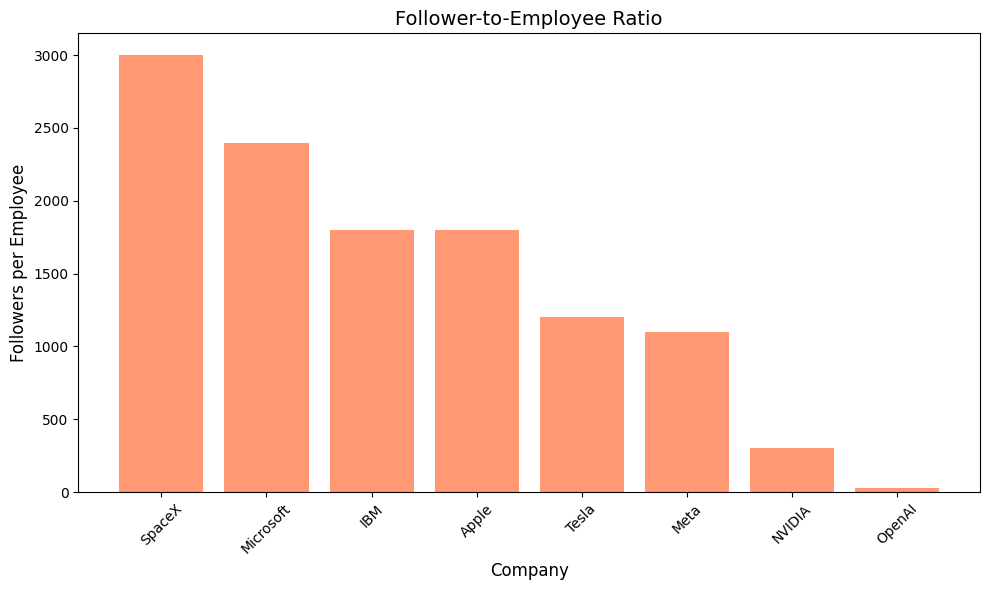

In [6]:
import matplotlib.pyplot as plt

#Top Companies by Followers (Horizontal Bar Chart)
df_sorted_followers = df.sort_values(by='followers', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(df_sorted_followers['company'], df_sorted_followers['followers'], color='teal', alpha=0.8)
plt.title("Top Companies by Followers", fontsize=14)
plt.xlabel("Number of Followers", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better ranking visualization
plt.tight_layout()
plt.show()

#Follower-to-Employee Ratio (Bar Chart)
df['follower_to_employee_ratio'] = df['followers'] / df['employees']
df_sorted_ratio = df.sort_values(by='follower_to_employee_ratio', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_ratio['company'], df_sorted_ratio['follower_to_employee_ratio'], color='coral', alpha=0.8)
plt.title("Follower-to-Employee Ratio", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Followers per Employee", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
